In [1]:
import os,sys,torch
import pandas as pd

In [2]:
from bulian.synthesizers import TwinSynthesizer,PrivateTwinSynthesizer
from bulian.metrics import *
from bulian.metrics.reports import *
from bulian.metrics import compute_metrics
from bulian.metrics.single_table import SingleTableMetric
from bulian.metrics.single_table import *

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

In [5]:
torch.cuda.is_available()

True

In [6]:
!nvidia-smi

Thu Jun 16 14:52:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.79       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   54C    P8    23W / 370W |   1322MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###### 

## Normal API: Non-privately differentiable synthesizer

In [7]:
data = pd.read_csv(r"F:\Users\Kaggle\bulian\examples\csv\adult.csv")

In [8]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [10]:
synth.fit(data=data,epochs=2,discrete_columns=discrete_columns)

In [12]:
sample = synth.sample(1000)

In [13]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

In [14]:
metrics

{'BNLogLikelihood': bulian.metrics.single_table.bayesian_network.BNLogLikelihood,
 'LogisticDetection': bulian.metrics.single_table.detection.sklearn.LogisticDetection,
 'SVCDetection': bulian.metrics.single_table.detection.sklearn.SVCDetection,
 'BinaryDecisionTreeClassifier': bulian.metrics.single_table.efficacy.binary.BinaryDecisionTreeClassifier,
 'BinaryAdaBoostClassifier': bulian.metrics.single_table.efficacy.binary.BinaryAdaBoostClassifier,
 'BinaryLogisticRegression': bulian.metrics.single_table.efficacy.binary.BinaryLogisticRegression,
 'BinaryMLPClassifier': bulian.metrics.single_table.efficacy.binary.BinaryMLPClassifier,
 'MulticlassDecisionTreeClassifier': bulian.metrics.single_table.efficacy.multiclass.MulticlassDecisionTreeClassifier,
 'MulticlassMLPClassifier': bulian.metrics.single_table.efficacy.multiclass.MulticlassMLPClassifier,
 'LinearRegression': bulian.metrics.single_table.efficacy.regression.LinearRegression,
 'MLPRegressor': bulian.metrics.single_table.efficacy

In [15]:
compute_metrics(metrics,data, sample)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,MetricType,error
0,BNLogLikelihood,BayesianNetwork Log Likelihood,NaN,NaN,-inf,0.0,MAXIMIZE,Likelihood Metric,Please install pomegranate with `pip install p...
1,LogisticDetection,LogisticRegression Detection,5.299968e-01,0.529997,0.0,1.0,MAXIMIZE,Real vs Synthetic Dectection Metric,None
2,SVCDetection,SVC Detection,3.705454e-01,0.370545,0.0,1.0,MAXIMIZE,Real vs Synthetic Dectection Metric,None
3,BinaryDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,ML Efficacy Metric: R-Sq or F1,`target` must be passed either directly or ins...
4,BinaryAdaBoostClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,ML Efficacy Metric: R-Sq or F1,`target` must be passed either directly or ins...
5,BinaryLogisticRegression,None,NaN,NaN,0.0,1.0,MAXIMIZE,ML Efficacy Metric: R-Sq or F1,`target` must be passed either directly or ins...
6,BinaryMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,ML Efficacy Metric: R-Sq or F1,`target` must be passed either directly or ins...
7,MulticlassDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,ML Efficacy Metric: R-Sq or F1,`target` must be passed either directly or ins...
8,MulticlassMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,ML Efficacy Metric: R-Sq or F1,`target` must be passed either directly or ins...
9,LinearRegression,None,NaN,NaN,-inf,1.0,MAXIMIZE,ML Efficacy Metric: R-Sq or F1,`target` must be passed either directly or ins...


#### Report with privacy metrics

avg_efficiency 70.94021696639896


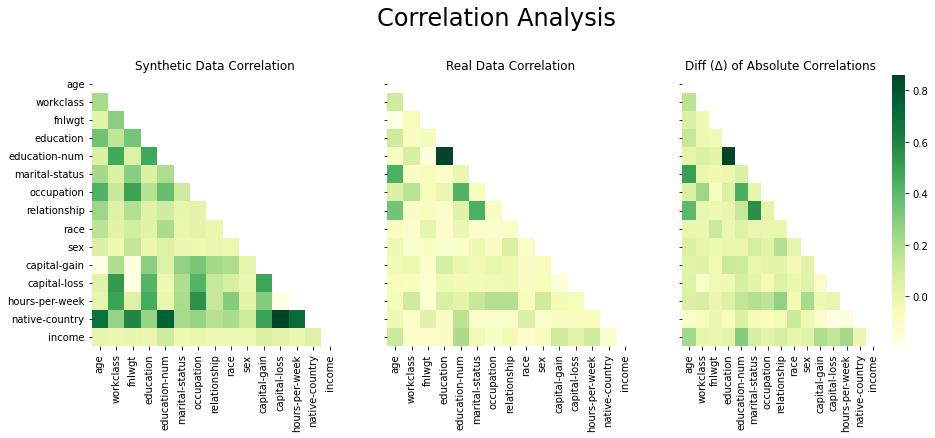

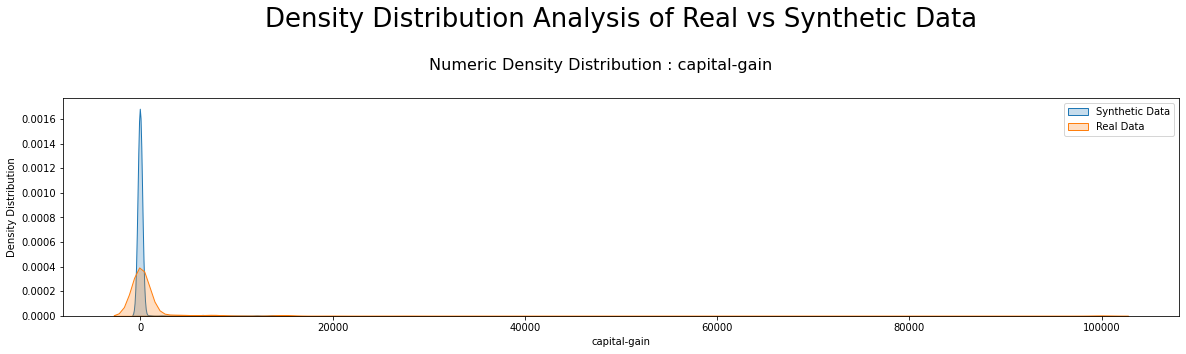

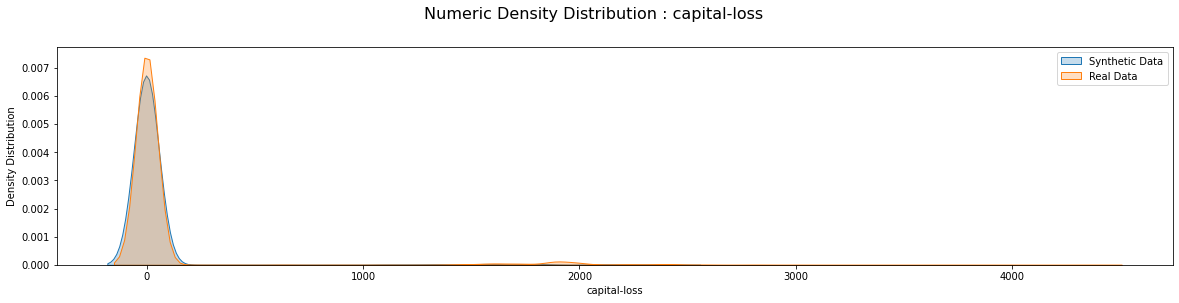

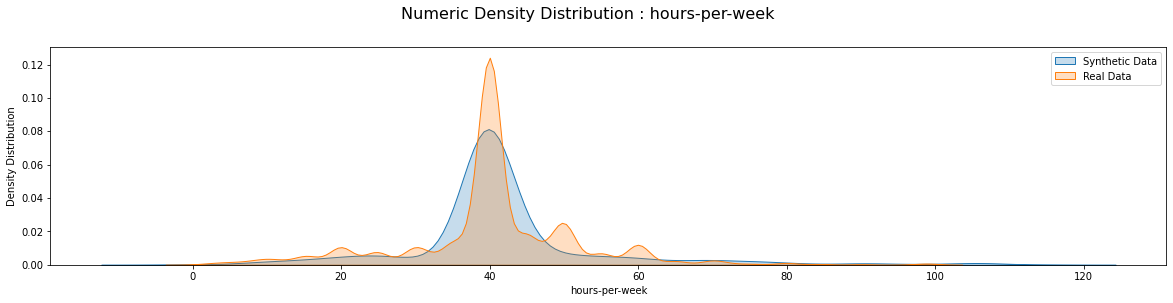

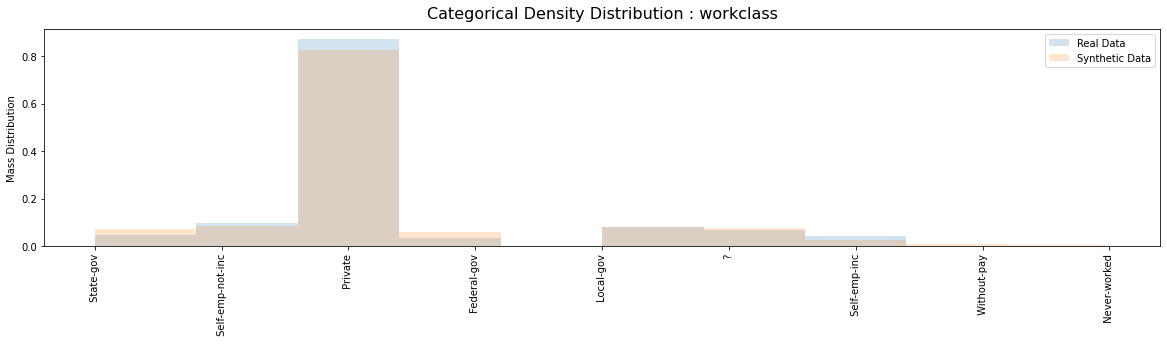

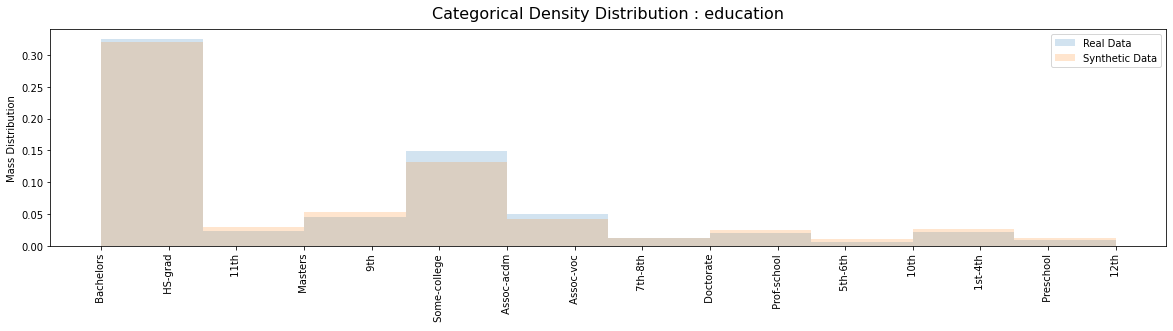

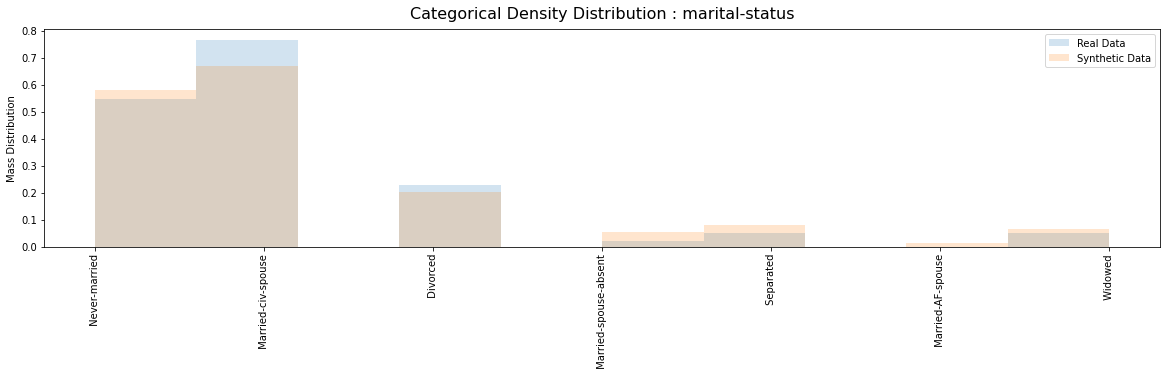

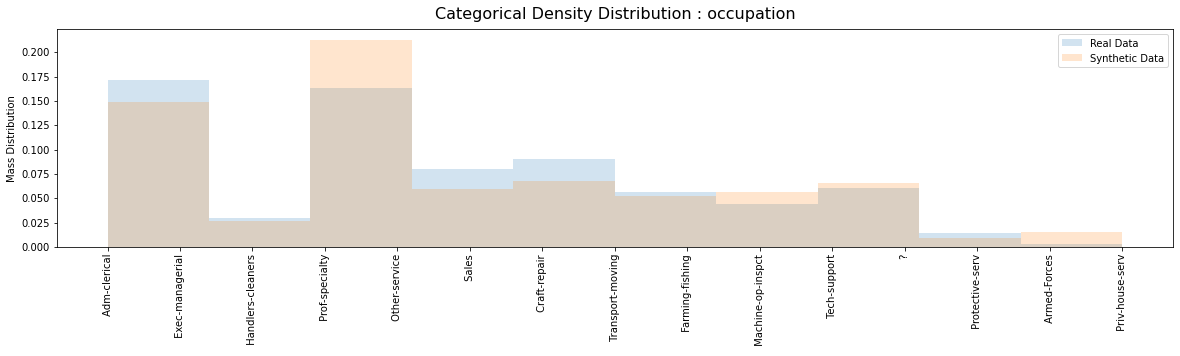

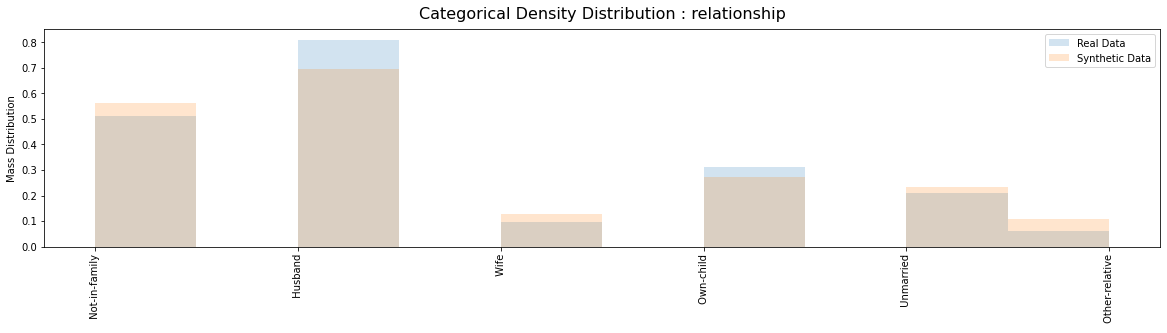

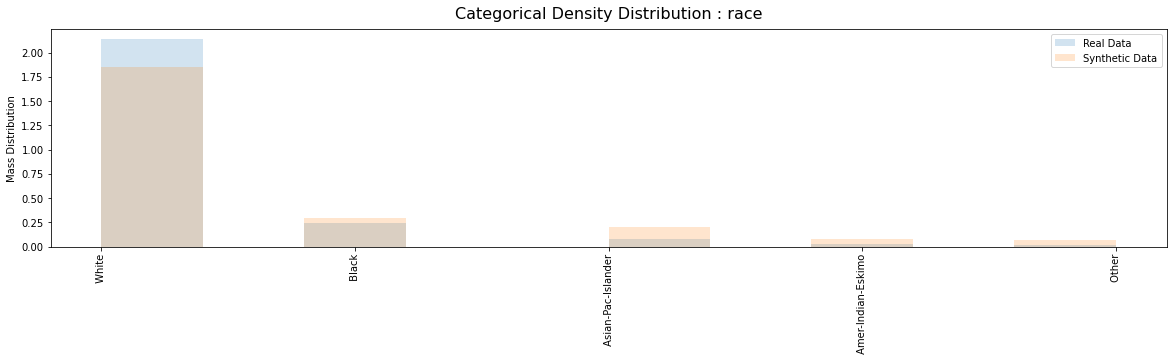

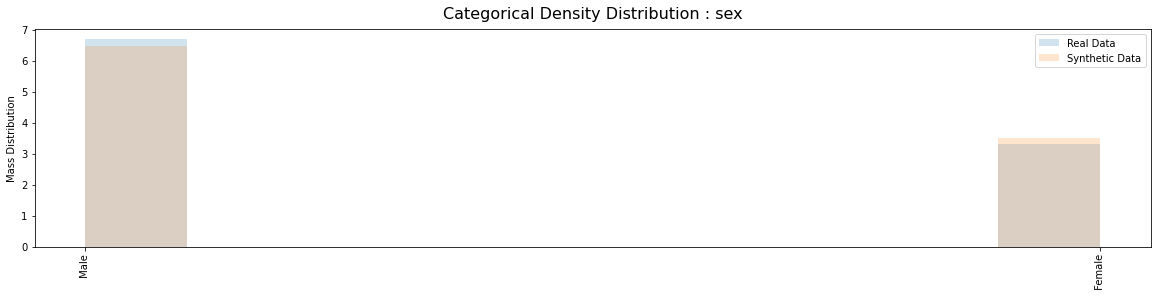

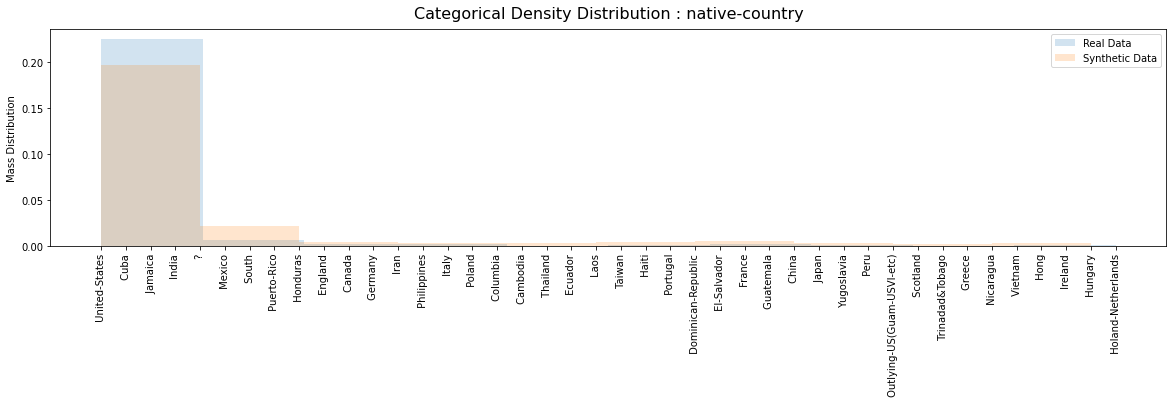

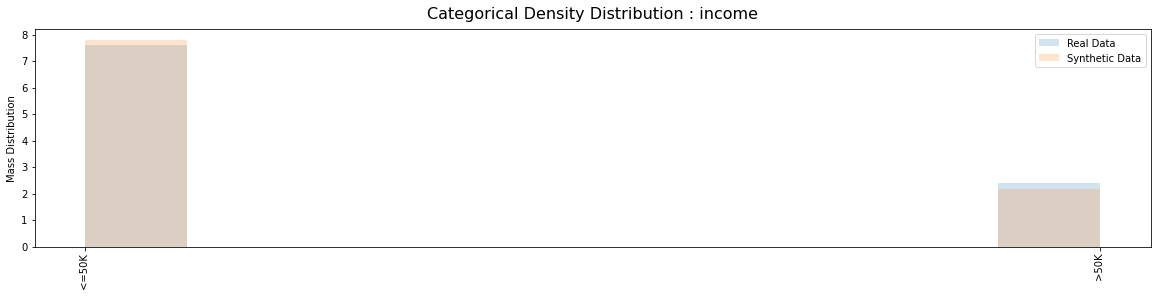

In [16]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

avg_efficiency 79.18861211112672


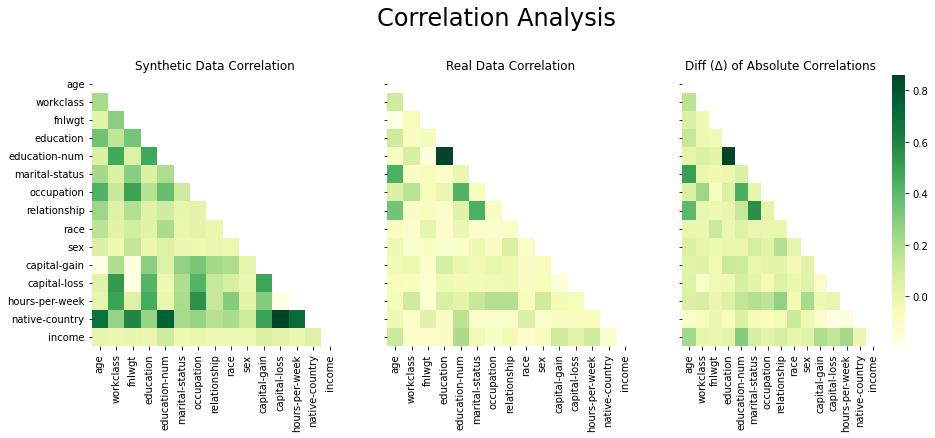

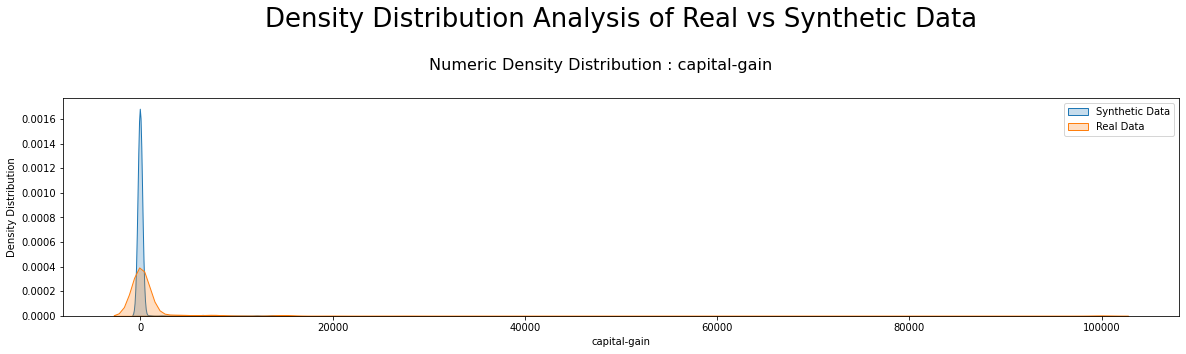

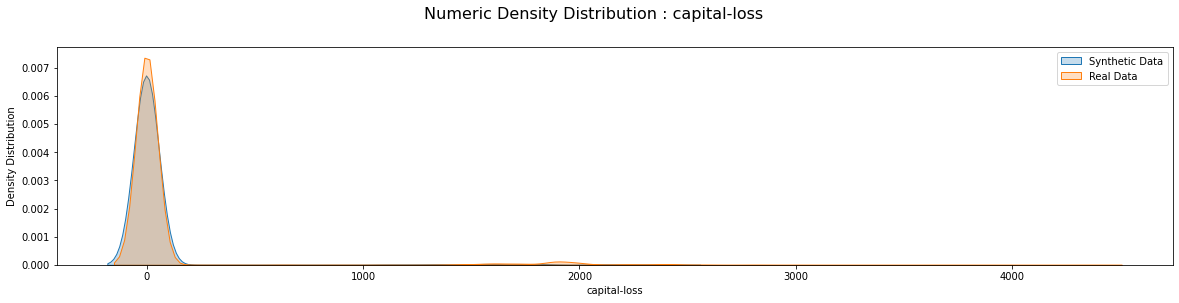

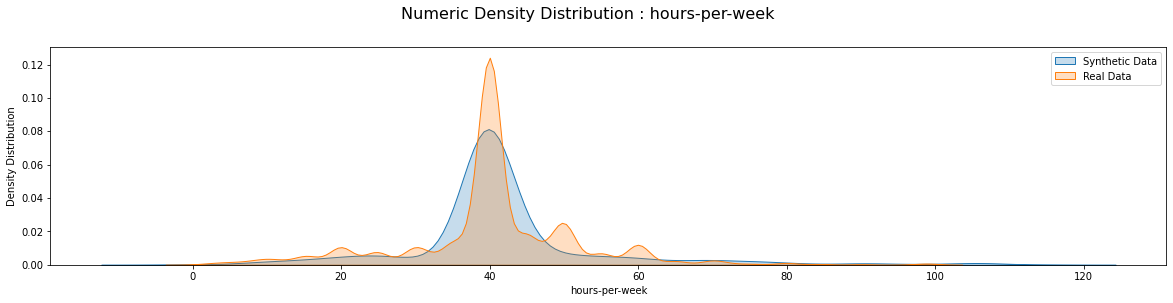

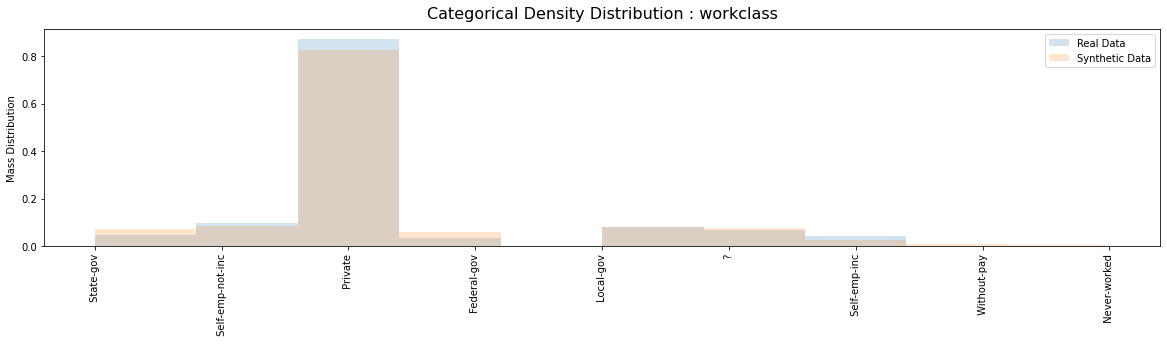

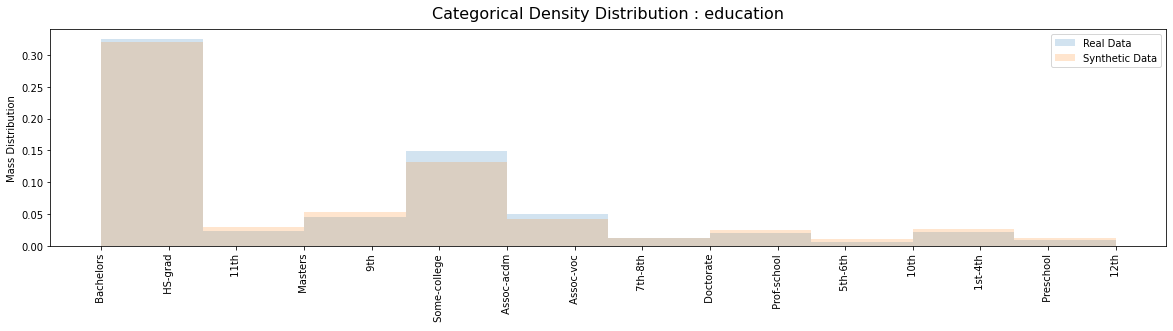

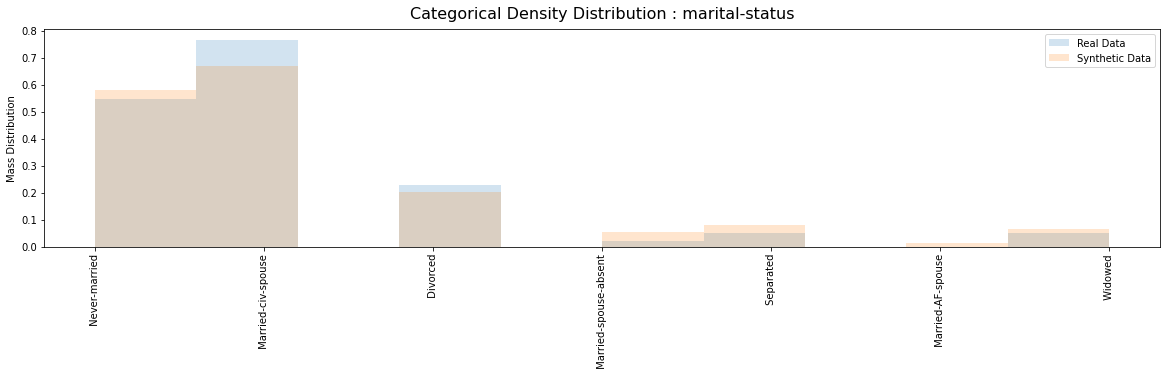

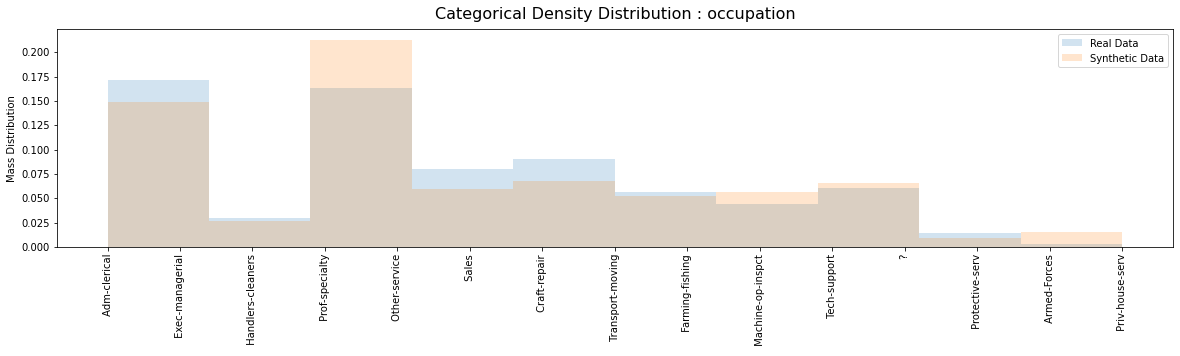

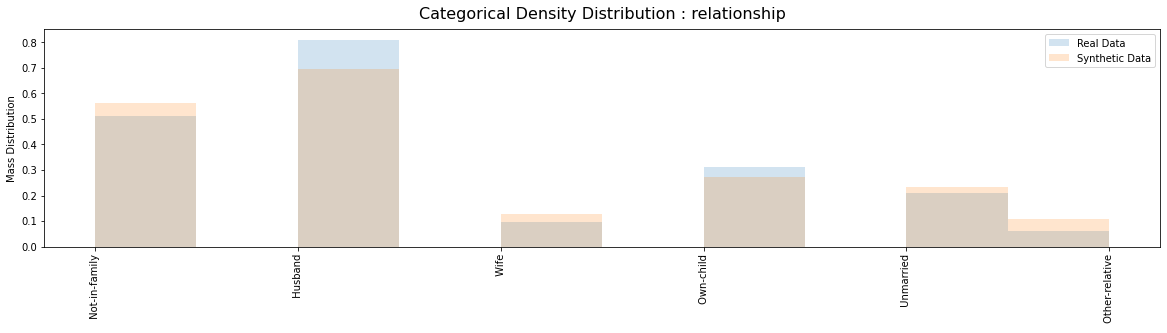

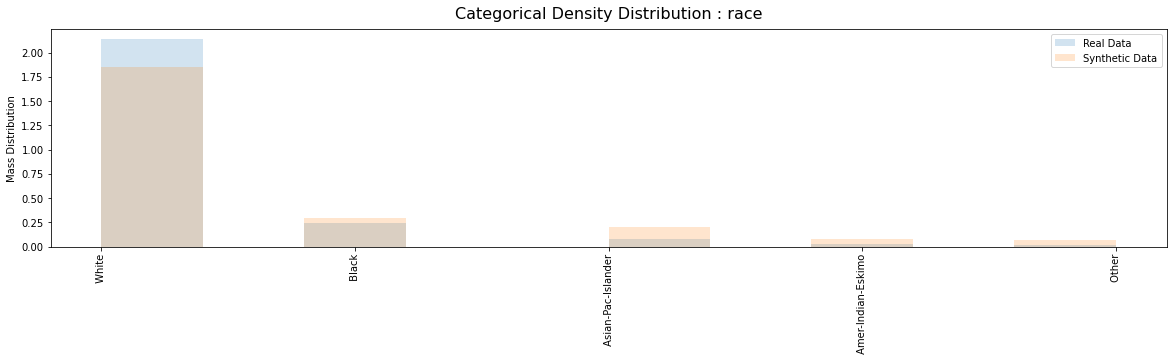

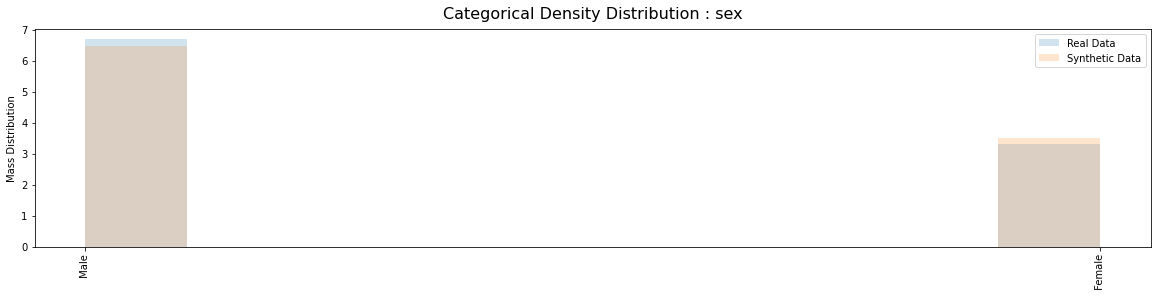

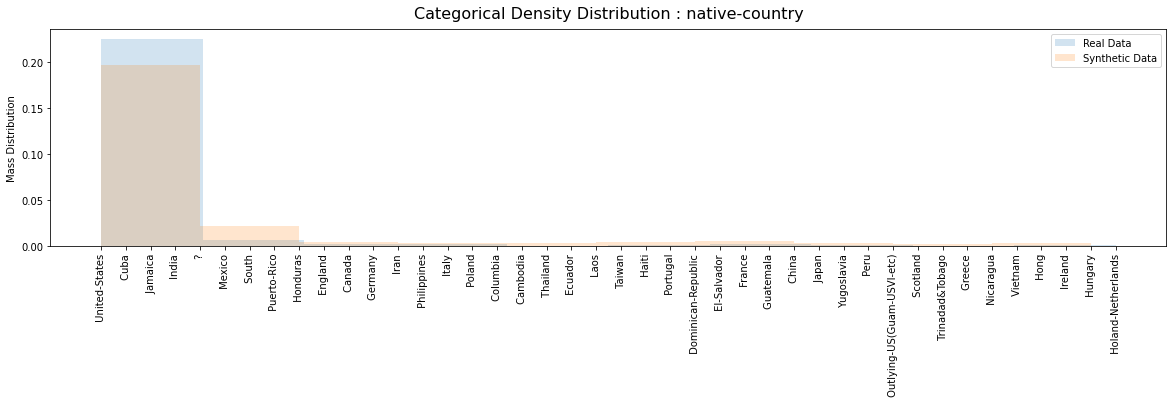

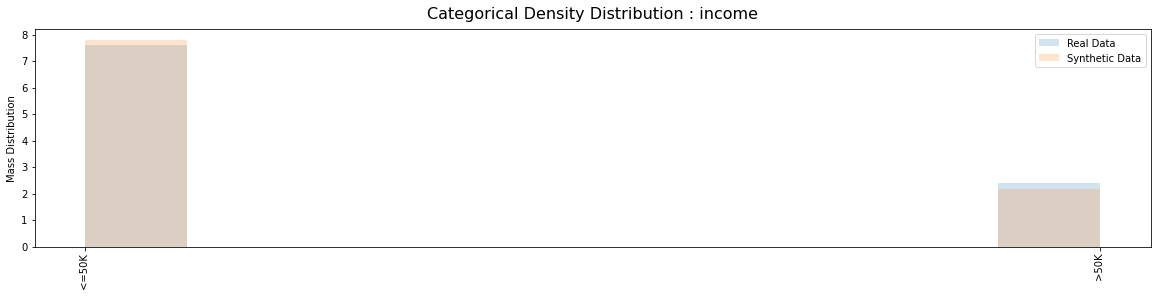

In [17]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [ ]:
synth.save('F:/Users/Kaggle/wids/NormalAPI.pth')

#### 

## Adversarial API: Non-privately differentiable synthesizer

In [ ]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [ ]:
synth.fit_adversarial(data=data,epochs=2,discrete_columns=discrete_columns,test_pct=0.33)

In [ ]:
sample = synth.sample_adversarial(data,1000)

In [ ]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [ ]:
synth.save('F:/Users/Kaggle/wids/AdversarialAPI.pth')

#### 

## Normal API: Privately differentiable synthesizer

In [ ]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cuda')   ### cpu else cuda

In [ ]:
synth.fit(data=data,discrete_columns=discrete_columns,update_epsilon=1)

In [ ]:
sample = synth.sample(1000)

In [ ]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [ ]:
synth.save('F:/Users/Kaggle/wids/PrivateModelNormalAPI.pth')

#### 

## Adversarial API: Privately differentiable synthesizer

In [ ]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cuda')   ### cpu else cuda

In [ ]:
synth.fit_adversarial(data=data,discrete_columns=discrete_columns,update_epsilon=1)

In [ ]:
sample = synth.sample_adversarial(data,1000)

In [ ]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

In [ ]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [ ]:
synth.save('F:/Users/Kaggle/wids/PrivateModelAdvAPI.pth')

#### 

### Fin ###